# Analysis of Nigerian Cars Dataset

# 1 - Introduction

This notebook focus on the variables in the Nigerian Car Prices dataset and investigate whether those variables have similar characteristics or features, using other variables in the data. The variables include car_id', 'price', 'fuel type', 'gear type', 'Make', 'Model', 'Year of manufacture', 'Colour', 'Condition', 'Mileage', 'Engine Size','Selling Condition', 'Bought Condition', 'car', 'Trim', 'Drivetrain', 'Seats', 'Number of Cylinders', 'Horse Power', 'Registered city'.

#Contents
#1	Introduction

#1.1 Questions

#2	Data Cleaning

#3	Exploratory Data Analysis

#4	Distribution of the Datasets

#4.1	The car's selling conditions.

#4.2	Type of fuel do cars most often in Nigeria use.

#4.3	The most popular type of car gear in Nigeria.

#4.4	The most popular brand of car in the Nigerian market.

#4.5	The cars with the highest prices.

#4.6	The cars with the highest mileage.

#4.7	The cars with the highest Number of Cylinders.

#4.8	The cars with the highest Number of Cylinders.

#4.9	Checking the Skewness of the variables

#4.10	Box plot

#4.11	3D Plot of some Variables

#4.12	Pair Plot of all the Variables

#5	Analysis of the Data

#5.1	Correlation between Variables (What is the relationship between price and other variables)

#5.2	Effects of independent variables (year of manufacture, mileage, engine size, seats, number of cylinders, and horsepower) on the dependent variable (price)

#5.3	Linear Regression Model Building

#5.4	Random forest regressor and random forest classifier

#5.5	Logistic Regression

#6	Summary

#7	Conclusions


# 1.1 - Questions
Below are the questions to answer in this analysis.

1 What are the car's selling conditions?

2 What type of fuel do cars most often in Nigeria use?

3 What is the most popular type of car gear in Nigeria?

4 What is the most popular brand of car in the Nigerian market?

5 What are the cars with the highest prices?

6 What are the cars with the highest mileage?

7 What are the cars with the highest Number of Cylinders?

8 What are the cars with the highest Number of Cylinders?

9 What is the relationship between price and other variables?

10 What is the effects of independent variables (year of manufacture, mileage, engine size, seats, number of cylinders, and horsepower) on the dependent variable (price)

11 What should the car sellers in Nigeria focus on?

In [8]:
#Importing lib. for descriptive and inferential analysis of the data
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import  stats
import pylab as pl
import math
%matplotlib widget
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as st
import statsmodels.api as sm
import math
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

# Load the data and view the first 10 rows

In [3]:
nigeriacar = pd.read_csv(r'C:\Users\HP\Downloads\KaggleData\Nigerian Car Prices dataset.csv')

In [4]:
nigeriacar.head(5)

,car_id,price,fueltype,geartype,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos


In [5]:
# Get the idea of the size of the dataset
nigeriacar.shape

(3722, 20)

The data contain 3722 rowas and 20columns.

In [6]:
#nigeriacar['gear type'].unique()

In [7]:
#Checking the information of the dataset
nigeriacar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fueltype             3721 non-null   object 
 3   geartype             3720 non-null   object 
 4   Make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   Year of manufacture  3722 non-null   int64  
 7   Colour               3717 non-null   object 
 8   Condition            3722 non-null   object 
 9   Mileage              3663 non-null   float64
 10  Engine Size          3661 non-null   float64
 11  Selling Condition    3722 non-null   object 
 12  Bought Condition     3722 non-null   object 
 13  car                  1767 non-null   object 
 14  Trim                 879 non-null    object 
 15  Drivetrain           838 non-null    o

13 of the variables are categorical (called object'), 5 of the variables are floats, and the remaining variables are numerical (called int').

# 2- Data Cleaning

Checking the information and na in the data using heatmap

In [8]:
nigeriacar.isnull()

,car_id,price,fueltype,geartype,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3717,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3718,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3719,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3720,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True


nigeriacar.isnull()

<AxesSubplot:>

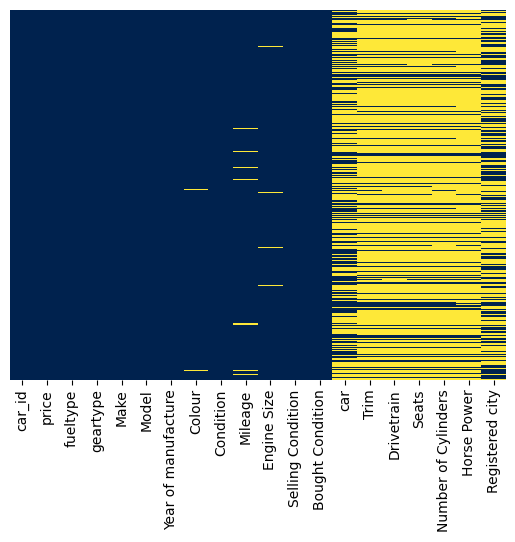

In [9]:
sns.heatmap(nigeriacar.isnull(),yticklabels=False,cbar=False,cmap='cividis')

From the dataset, a few columns have (NA) and will not add any insight to the analysis. Also, the above heatmap results show that there is no information, so there is a need to fill in the missing data. Below is the filling of the NAs in this dataset.

In [10]:
#Change NA to 0
nigeriacar['Colour'] = nigeriacar['Colour'].fillna(0)
nigeriacar['Mileage'] = nigeriacar['Mileage'].fillna(0)
nigeriacar['Engine Size'] = nigeriacar['Engine Size'].fillna(0)
nigeriacar['car'] = nigeriacar['car'].fillna(0)
nigeriacar['Trim'] = nigeriacar['Trim'].fillna(0)
nigeriacar['Drivetrain'] = nigeriacar['Drivetrain'].fillna(0)
nigeriacar['Seats'] = nigeriacar['Seats'].fillna(0)
nigeriacar['Number of Cylinders'] = nigeriacar['Number of Cylinders'].fillna(0)
nigeriacar['Horse Power'] = nigeriacar['Horse Power'].fillna(0)
nigeriacar['Registered city'] = nigeriacar['Registered city'].fillna(0)

In [11]:
df = nigeriacar.dropna()
nigeriacar.duplicated().sum()
#starbucks.drop_duplicates(inplace=True)
#We dropped all the cell that is not releveant to the analysis.

602

<AxesSubplot:>

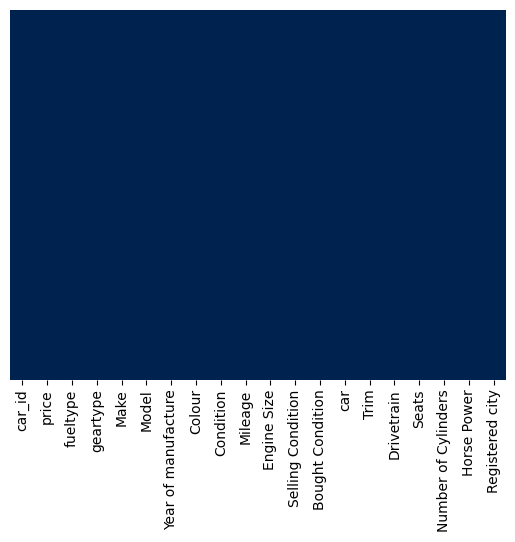

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cividis')

After NA has filled out the above information, show the summary of the dataset. From the above new heatmap, we now have a clean dataset (there are no more missing values or NAs). We can proceed to explore the dataset.

# 3 - Descriptive Analysis

Information bellow shows the descriptive analysis of the data.

In [13]:
df.describe()

,price,Year of manufacture,Mileage,Engine Size,Seats,Number of Cylinders,Horse Power
count,3.720000e+03,3720.000000,3.720000e+03,3.720000e+03,3720.000000,3720.000000,3720.000000
mean,4.515702e+06,2008.146774,1.919759e+05,1.090434e+04,1.118280,1.145161,42.347312
std,4.297883e+06,4.206611,1.405804e+05,1.082526e+05,2.190323,2.217388,89.861309
min,5.500000e+05,1979.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2.310000e+06,2005.000000,1.154365e+05,2.000000e+03,0.000000,0.000000,0.000000
50%,3.360000e+06,2008.000000,1.741720e+05,2.500000e+03,0.000000,0.000000,0.000000
75%,5.040000e+06,2011.000000,2.430682e+05,3.500000e+03,0.000000,0.000000,0.000000
max,6.240000e+07,2022.000000,2.456318e+06,3.500000e+06,8.000000,8.000000,585.000000


The average price is 4.515702e+06; the average year of manufacture is 2008.146774; the average mileage is 3.720000e+03; the average engine size is 1.090434e+04; the average number of seats is 1.118280; the average number of cylinders is 1.145161; and the average horse power of the cars is 42.347312. Thus, the cars horsepower has the highest mean value. For the median of the dataset, the median of price is 4.297883e+06, the median of cars year of manufacture is 4.206611, the median of cars mileage is 1.405804e+05, the median of cars engine size is 1.082526e+05, the median of cars seats is 2.190323, the median of cars number of cylinders is 2.217388, and the median of cars horse power is 89.861309

# 4- Distribution of the Datasets

In [14]:
df.columns

Index(['car_id', 'price', 'fueltype', 'geartype', 'Make', 'Model',
       'Year of manufacture', 'Colour', 'Condition', 'Mileage', 'Engine Size',
       'Selling Condition', 'Bought Condition', 'car', 'Trim', 'Drivetrain',
       'Seats', 'Number of Cylinders', 'Horse Power', 'Registered city'],
      dtype='object')

In [15]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

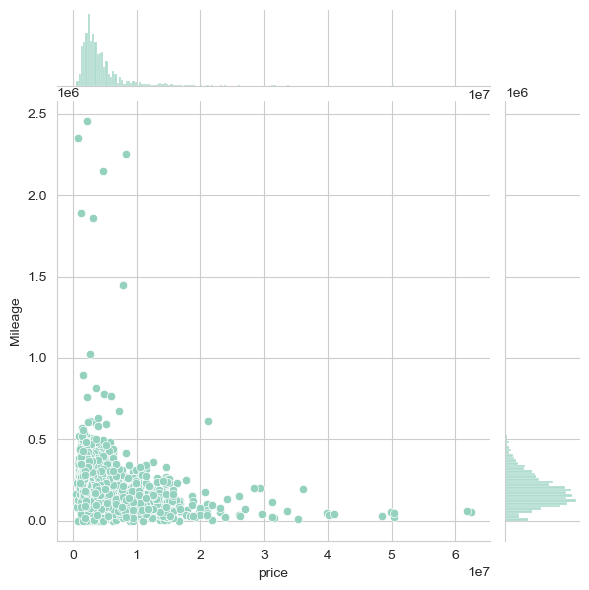

In [16]:
# More time on site, more money spent.
sns.jointplot(x='price',y='Mileage',data=df)

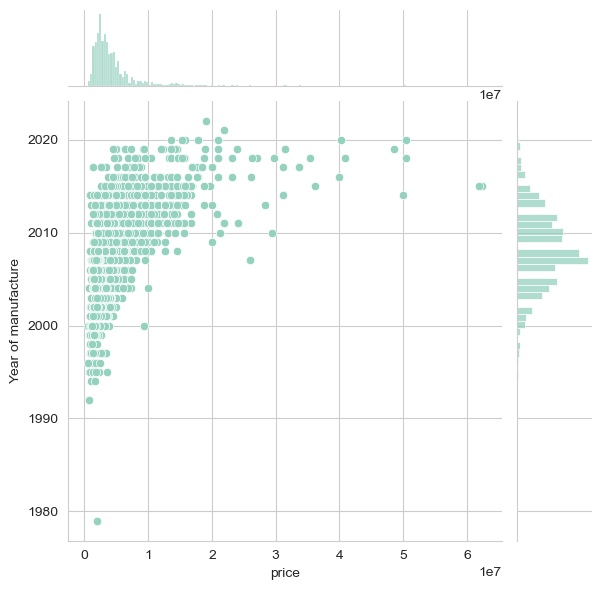

In [17]:
# More time on site, more money spent.
sns.jointplot(x='price',y='Year of manufacture',data=df)

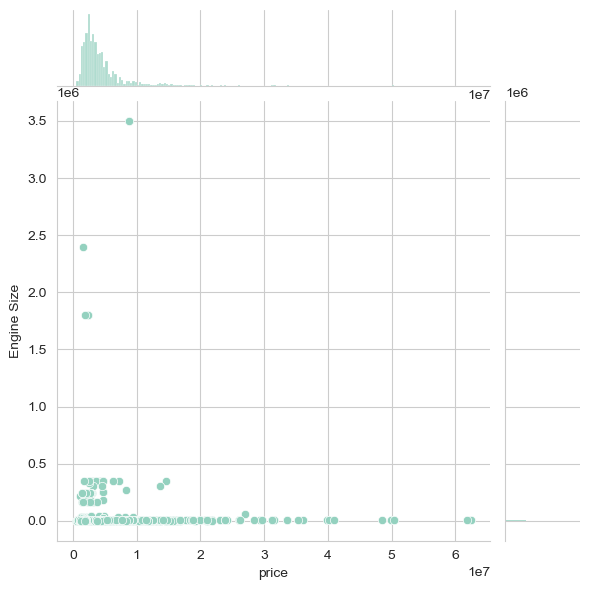

In [18]:
# More time on site, more money spent.
sns.jointplot(x='price',y='Engine Size',data=df)

# 4.1 - Car's selling conditions.
Distribution of Cars selling conditions.

Text(0, 0.5, 'Frequency')

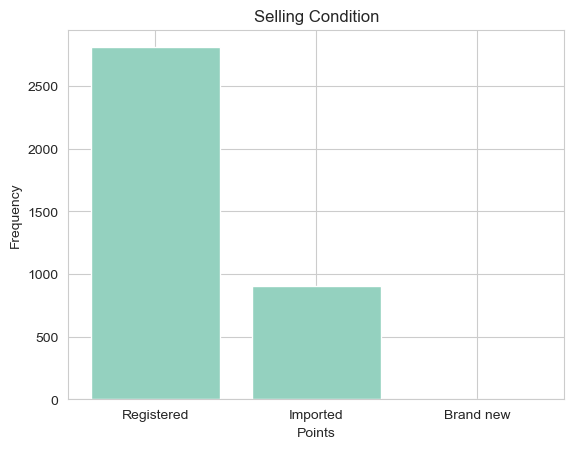

In [19]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = df['Selling Condition'].value_counts() 
# get x and y data 
SellingCondition = data.index 
frequency = data.values 
# create bar chart 
ax.bar(SellingCondition, frequency) 
# set title and labels 
ax.set_title('Selling Condition') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

#Distribution of Cars selling conditions shows that majority of cars in Nigeria is registered while few of the cars in Nigeria brand new cars

# 4.2 - Type of fuel cars most often use in Nigeria.

Text(0, 0.5, 'Frequency')

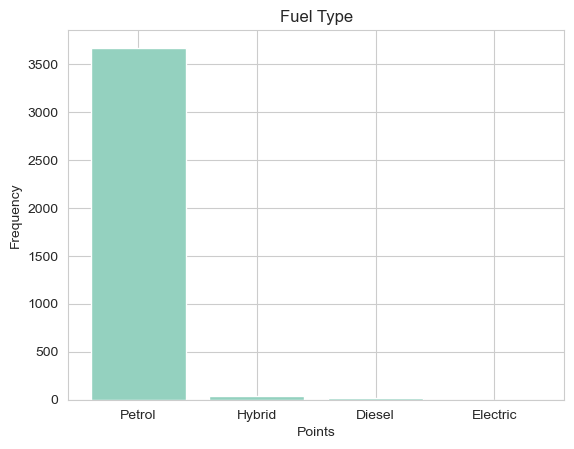

In [20]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = df['fueltype'].value_counts() 
# get x and y data 
fueltype = data.index 
frequency = data.values 
# create bar chart 
ax.bar(fueltype, frequency) 
# set title and labels 
ax.set_title('Fuel Type') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

The data shows that the majority of the cars in Nigeria use gasoline, which is above 3500, followed by a few hybrids, which are less than 500, while the number of cars that use diesel is less than 500. Also, the data shows that there are no electric cars in Nigeria.

# 4.3 - Most popular type of car gear in Nigeria. 

Text(0, 0.5, 'Frequency')

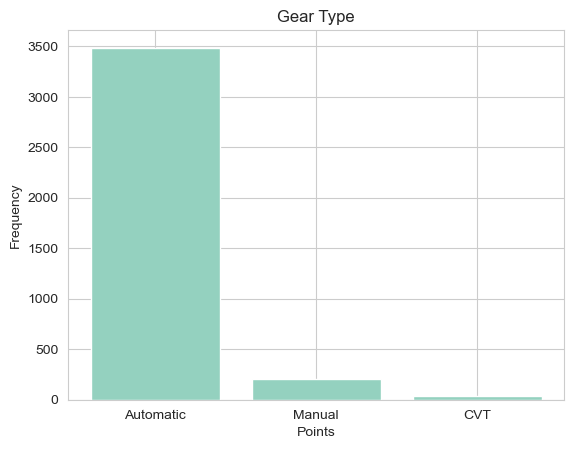

In [21]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = df['geartype'].value_counts() 
# get x and y data 
geartype = data.index 
frequency = data.values 
# create bar chart 
ax.bar(geartype, frequency) 
# set title and labels 
ax.set_title('Gear Type') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

From the above figure, the most popular type of car gear in Nigeria is the automatic gear type. Manual car is less that 500, while CVT gear type is very have the lower number in Nigeria market.

# 4.4 - Most popular brand of car in the Nigerian market.

Text(0.5, 0, 'Frequency')

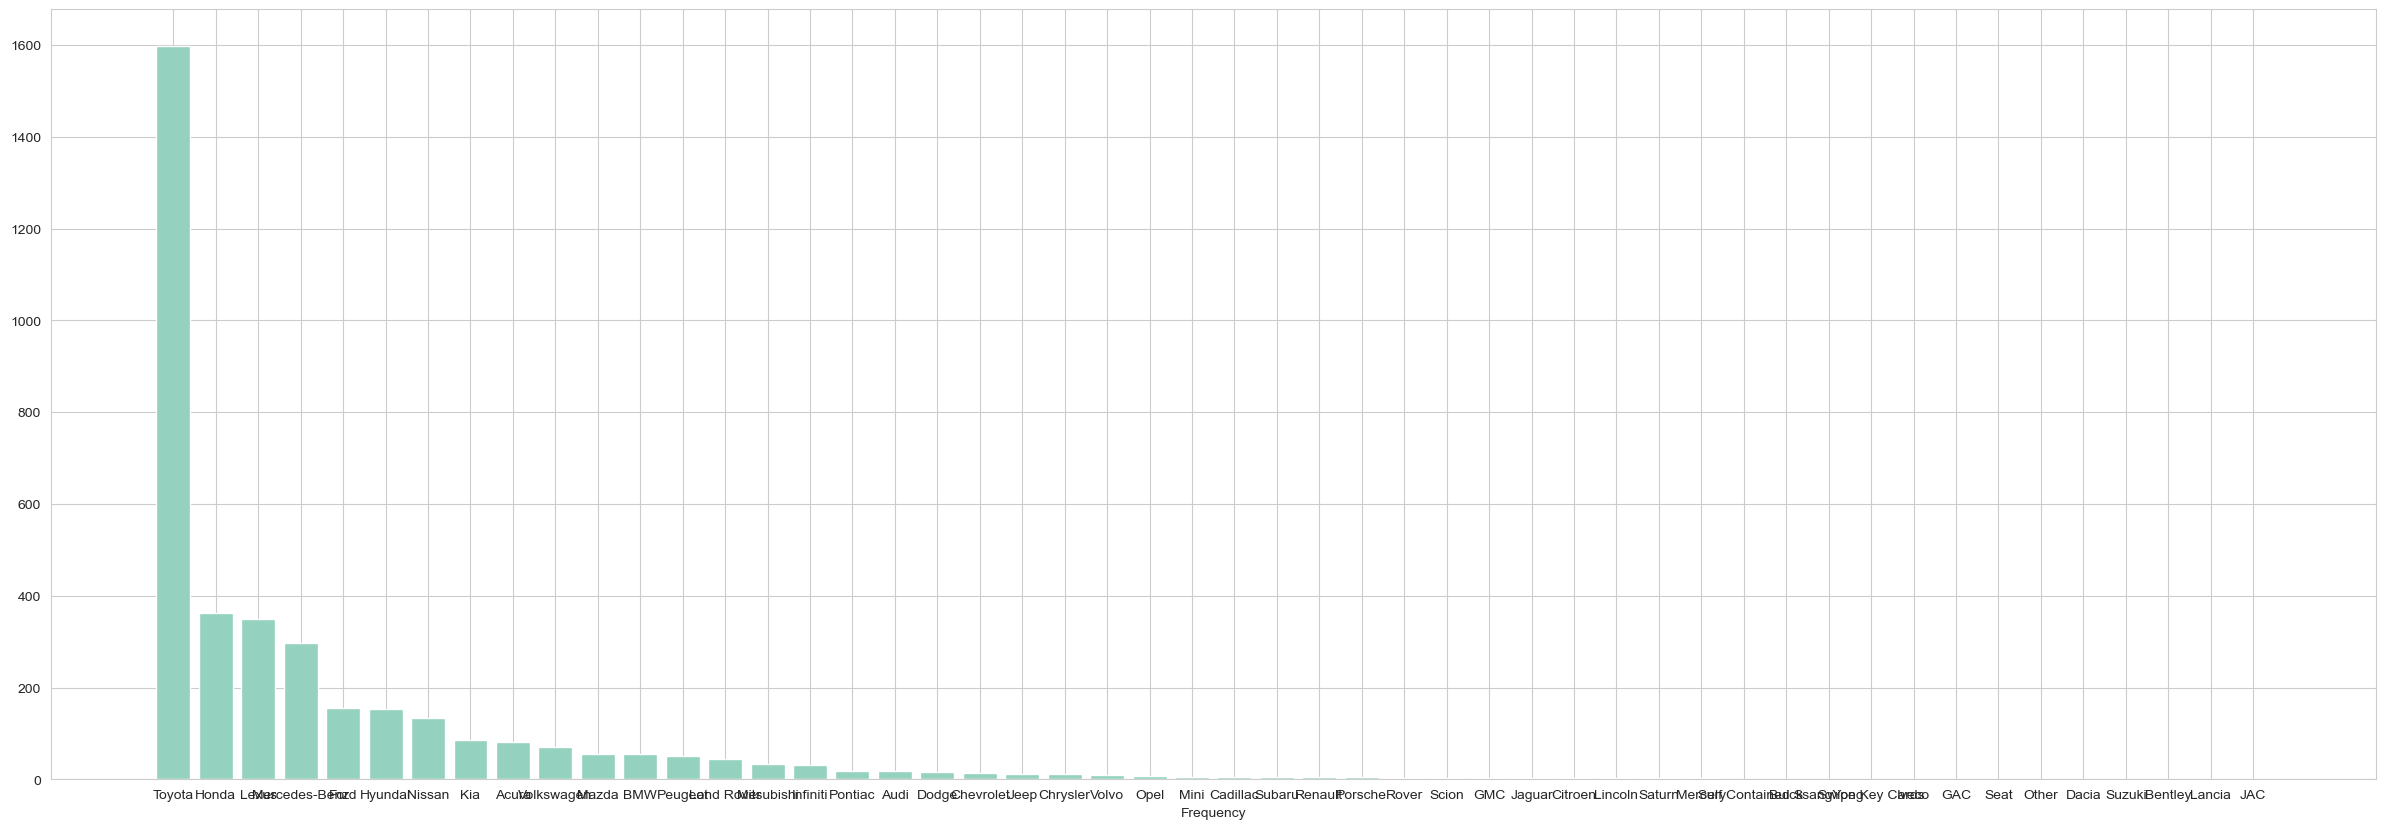

In [22]:
#plt.figure(figsize=(10,30))
# create a figure and axis 
fig, ay = plt.subplots(figsize=(30,10)) 
# count the occurrence of each class 
data = df['Make'].value_counts() 
# get x and y data 
Make = data.index 
frequency = data.values 
# create bar chart 
ay.bar(Make, frequency) 
# set title and labels 
ax.set_title('Make') 
ax.set_xlabel('Points') 
ay.set_xlabel('Frequency')

The data shows that Toyota is the most popular car in the Nigerian market, followed by Honda, Mercedes, Ford, Hyundai, Nissan Kia Acura, Volkswagen, Mazda, BMW, Peugeot, and so on.

[Text(0.5, 0, 'price'), Text(0, 0.5, 'Horse Power'), Text(0.5, 1.0, 'Price of Model')]


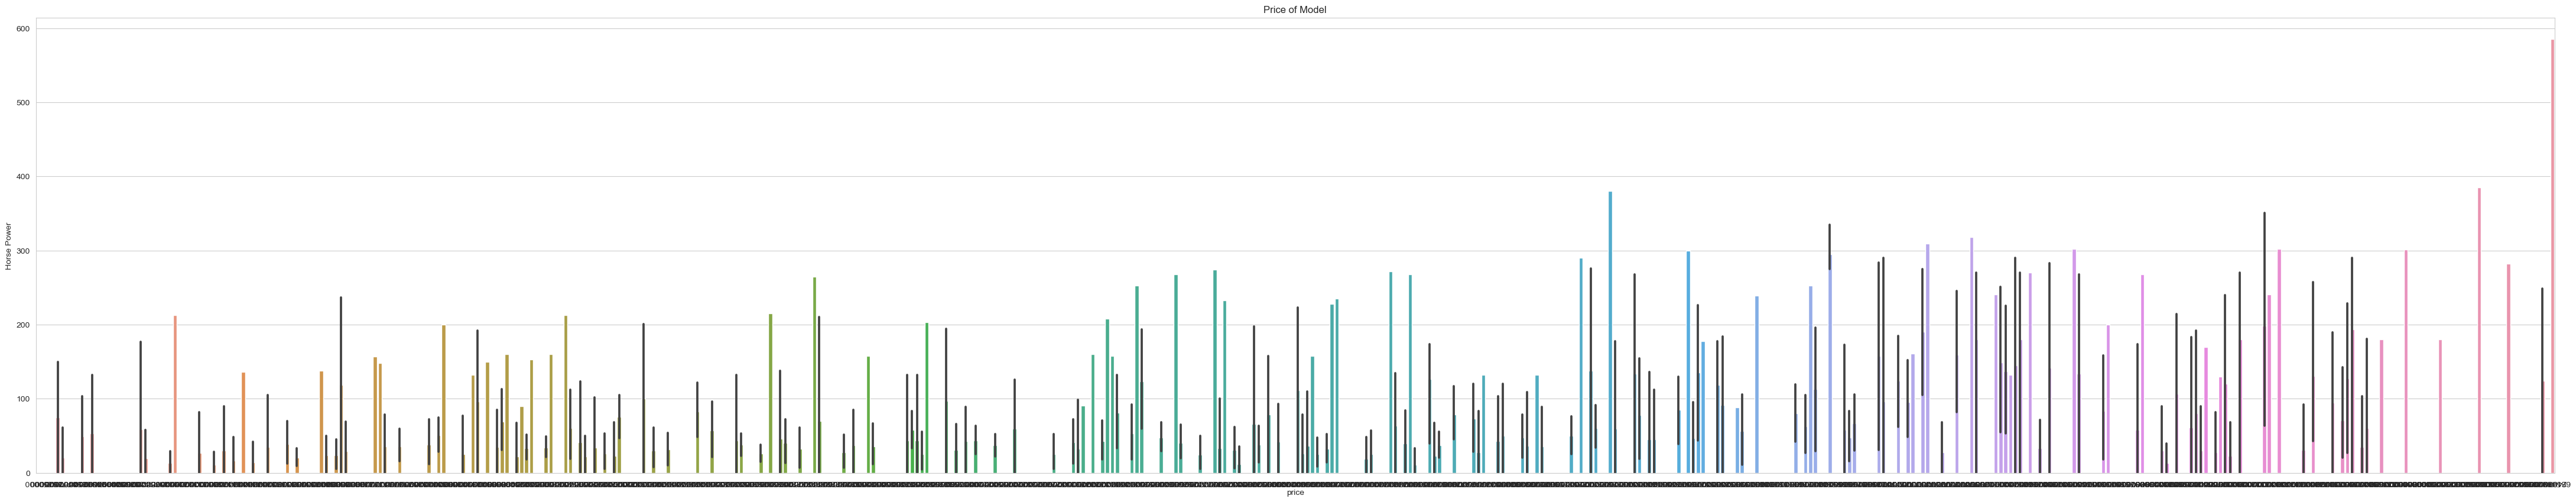

In [23]:
#plt.figure(figsize=(10,40))
#hp = sns.lineplot(x='Horse Power', y='price', data=df)
#print(hp)  

plt.figure(figsize=(55,10))
plot = sns.barplot(y=df['Horse Power'], x=df['price']).set(xlabel='price', ylabel='Horse Power', title='Price of Model')
plt.xticks(rotation=180)
print(plot)

[Text(0.5, 0, 'Price'), Text(0, 0.5, 'Model'), Text(0.5, 1.0, 'Price of Model')]


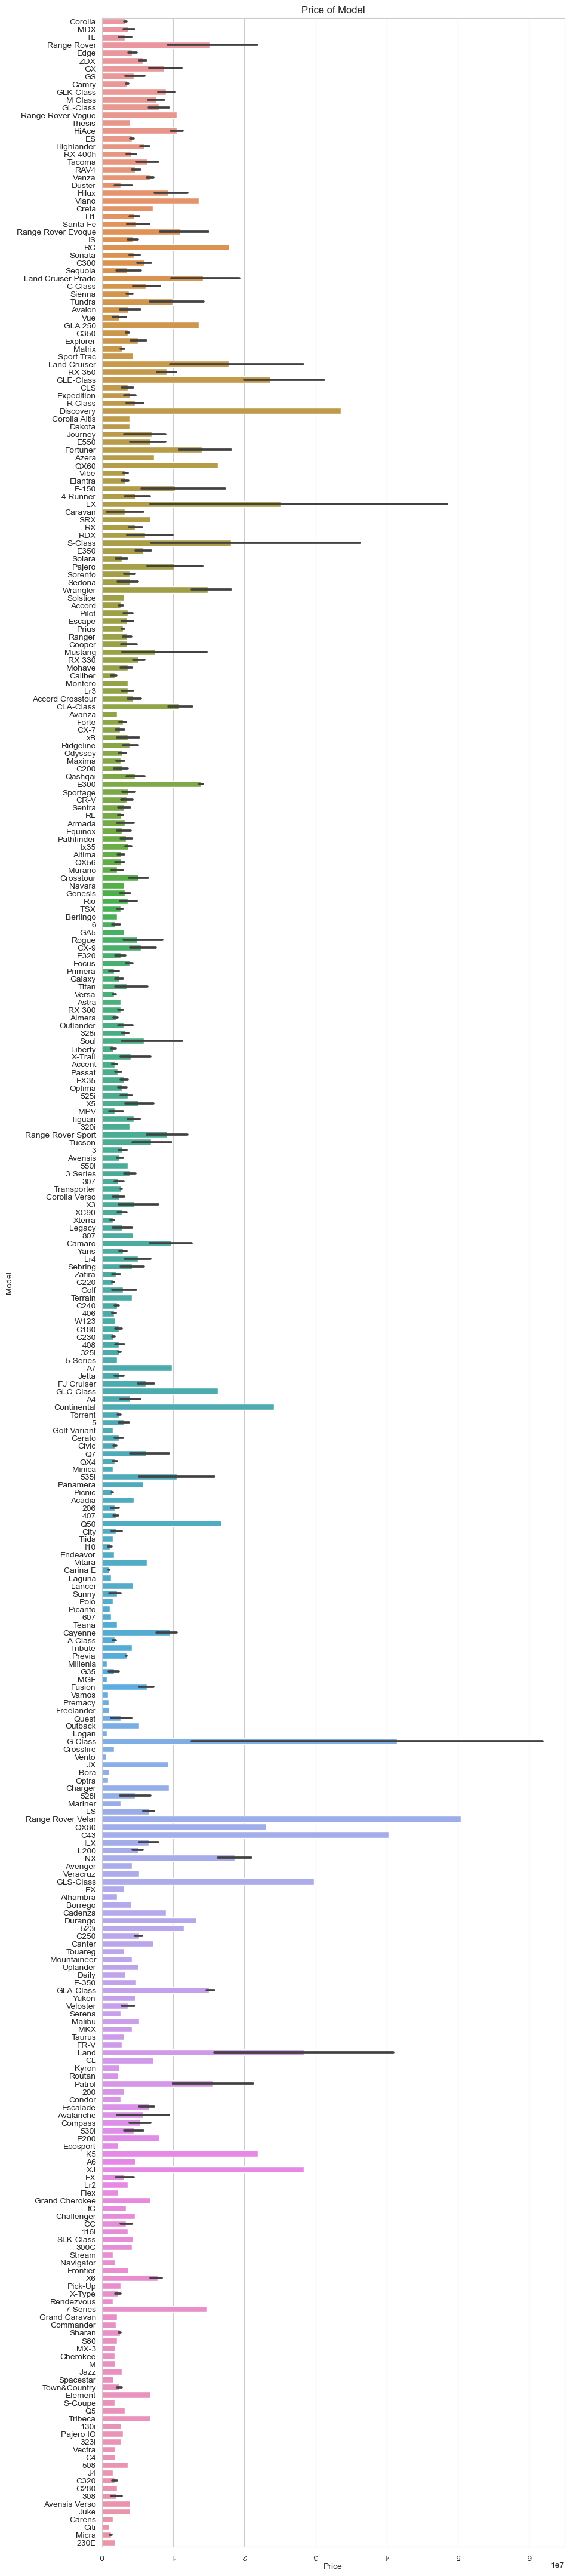

In [24]:
plt.figure(figsize=(10,55))
plot = sns.barplot(y=df['Model'], x=df['price']).set(xlabel='Price', ylabel='Model', title='Price of Model')
plt.xticks(rotation=180)
print(plot)

# 4.5 - The cars with the highest prices.

In [25]:
df.Price = df[['Make','price', 'Model']]
df.Price.columns = ['Make', 'price', 'Model']
df.Price
df.Price.sort_values("price", ascending=False)

,Make,price,Model
310,Mercedes-Benz,62400000,S-Class
1667,Mercedes-Benz,61875000,G-Class
1877,Land Rover,50400000,Range Rover Velar
2070,Toyota,50400000,Land Cruiser
1892,Mercedes-Benz,49920000,G-Class
...,...,...,...
1691,Honda,682500,Accord
1681,Honda,682500,Accord
1694,Volkswagen,630000,Vento
1677,Volkswagen,630000,Vento


From the above plot, Mercedes-Benz 310 S-Class has the highest price, followed by Mercedes-Benz 1667 G-Class, Land Rover 1877, and Toyota 2070. Thus, the most common car with the highest price is a Mercedes-Benz, while the Volkswagen Vento and Honda Civic have the lowest prices compared to others in the Nigerian market.

# 4.6 - The cars with the highest mileage.

In [26]:
df.mileage = df[['Make','Mileage', 'Model']]
df.mileage.columns = ['Make', 'Mileage', 'Model']
df.mileage
df.mileage.sort_values("Mileage", ascending=False)

,Make,Mileage,Model
1150,Toyota,2456318.0,Corolla
1136,Toyota,2456318.0,Corolla
1618,Toyota,2352152.0,Corolla
42,Toyota,2255693.0,Venza
1968,Lexus,2146100.0,RX
...,...,...,...
1586,Honda,0.0,Vamos
2144,Toyota,0.0,Corolla
2919,Chevrolet,0.0,Avalanche
114,Mercedes-Benz,0.0,M Class


From the above plot Toyota 1150, 1136, 1618, 42 and lexus 1986 has the highest mileage, while Nissan 3167,. Thus the most common car with highest Mercedes-Benz and while Volkswagen and Honda has the lowest price compar to others.

# 4.7 - The cars with the highest Number of Cylinders.

In [27]:
df.cyl = df[['Make','Number of Cylinders', 'Model']]
df.cyl.columns = ['Make', 'Number of Cylinders', 'Model']
df.cyl
df.cyl.sort_values("Number of Cylinders", ascending=False)

,Make,Number of Cylinders,Model
2625,Lexus,8.0,LS
1678,Mercedes-Benz,8.0,GL-Class
462,Ford,8.0,F-150
1689,Mercedes-Benz,8.0,GL-Class
1515,Mercedes-Benz,8.0,GL-Class
...,...,...,...
1370,Ford,0.0,Edge
1371,Honda,0.0,Accord
1372,Honda,0.0,Accord
1373,Honda,0.0,Civic


From the above analysis, the Luxus-LS, Mercedes-Benz GL-Class, and Ford F-150 have 8.0 cylinders. Thus, the cars with the highest number of cylinders are the Luxus LS, Mercedes-Benz GL-Class, and Ford F-150.

# 4.8 - The condition of the car with the highest number.

In [28]:
df.condition = df[['Make','Condition', 'Model']]
df.condition.columns = ['Make', 'Condition', 'Model']
df.condition
df.condition.sort_values("Condition", ascending=False)

,Make,Condition,Model
0,Toyota,Nigerian Used,Corolla
2399,Toyota,Nigerian Used,Highlander
2348,Toyota,Nigerian Used,RAV4
2353,Toyota,Nigerian Used,Camry
2355,Kia,Nigerian Used,Sorento
...,...,...,...
2064,Honda,Foreign Used,Odyssey
2061,Hyundai,Foreign Used,Veracruz
2889,Volkswagen,Foreign Used,Jetta
706,Toyota,Brand New,Corolla


Toyota (Corolla, Highlander, RAV4, Camry) and KIA Serento are mostly used cars in good condition in the Nigerian market.

In [ ]:
sns.displot(df,x="avg_price_per_room",hue="booking_status", kind="kde")

# 4.9 - Checking the Skewness of the variables

In [30]:
df.skew()

price                   4.983386
Year of manufacture    -0.224648
Mileage                 6.702307
Engine Size            24.766866
Seats                   1.532486
Number of Cylinders     1.581994
Horse Power             1.982615
dtype: float64

The variables with skewness > 1 are highly positively skewed.The variables with skewness  -1 are highly negatively skewed. The variables with a skewness of 0.5 or greater are moderately positively skewed. The variables with a skewness of -0.5 skewness -1 are moderately negatively skewed. And the variables with a skewness of less than 0.5 are symmetric. From the skewness, we have seen that the price, mileage, engine size, seats, number of cylinders and horse power variables are highly positively skewed, while year of manufacture.

# 4.10 - Box plot

<AxesSubplot:>

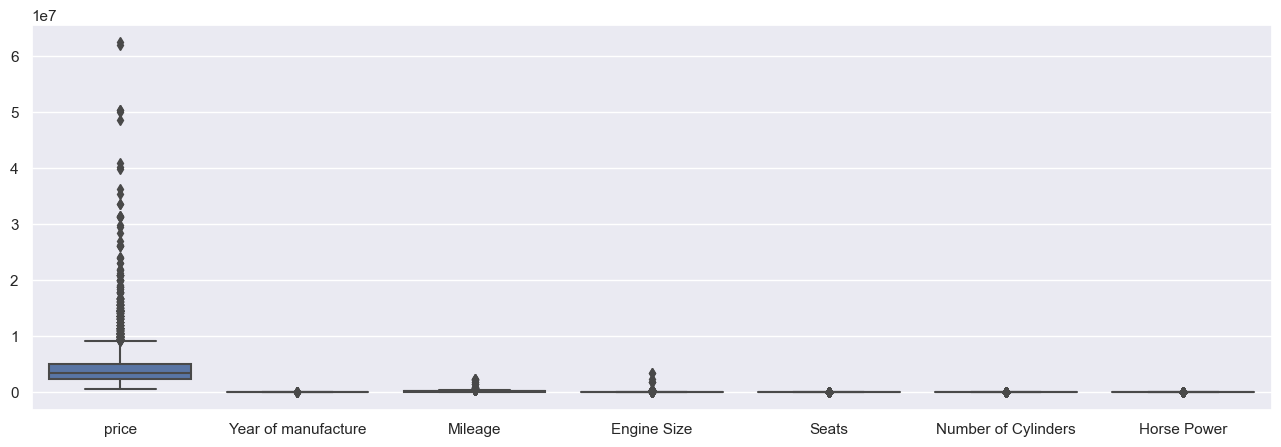

In [31]:
#Box plot for all the numerical variables
sns.set(rc={'figure.figsize': (16, 5)})
 
# multiple box plot illustration
sns.boxplot(data=df.select_dtypes(include='number'))

# 4.11 - 3D Plot of some Variables

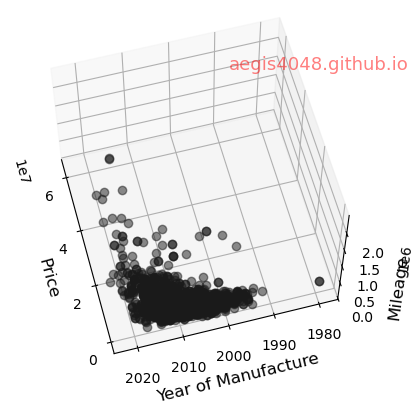

In [34]:
x = df['price']
y = df['Year of manufacture']
z = df['Mileage']

x_pred = np.linspace(6, 24, 30)   
y_pred = np.linspace(0.93, 2.9, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(133, projection='3d')

axes = [ax1]#, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Year of Manufacture', fontsize=12)
    ax.set_zlabel('Mileage', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='red', alpha=0.5)

ax1.view_init(elev=60, azim=165)

fig.tight_layout()

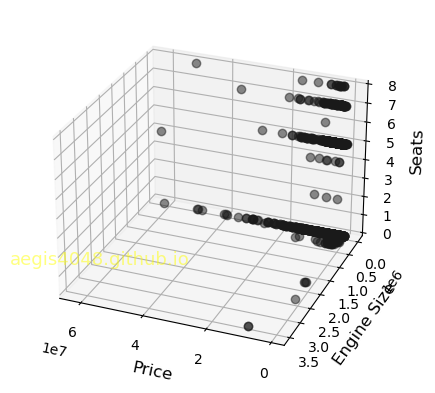

In [35]:
x = df['price']
y = df['Engine Size']
z = df['Seats']

x_pred = np.linspace(6, 24, 30)     
y_pred = np.linspace(0.93, 2.9, 30)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')

axes = [ax1]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Engine Size', fontsize=12)
    ax.set_zlabel('Seats', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='yellow', alpha=0.5)

ax1.view_init(elev=27, azim=112)

fig.tight_layout()

The above 3D plot shows that there is no linear relationship betweeen log of Calories, and others

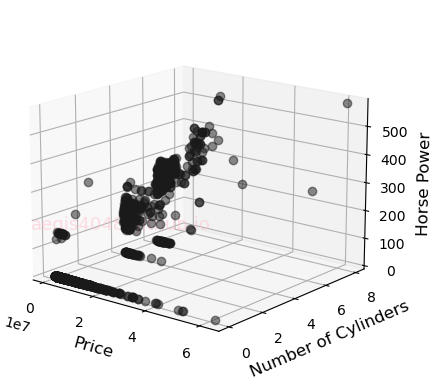

In [36]:
x = df['price']
y = df['Number of Cylinders']
z = df['Horse Power']

x_pred = np.linspace(6, 24, 30)     
y_pred = np.linspace(0.93, 2.9, 30)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax2 = fig.add_subplot(132, projection='3d')

axes = [ax2]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.set_xlabel('Price', fontsize=12)
    ax.set_ylabel('Number of Cylinders', fontsize=12)
    ax.set_zlabel('Horse Power', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='pink', alpha=0.5)

ax2.view_init(elev=16, azim=-51)

fig.tight_layout()

# 4.12 - Pair Plot of all the Vaariables

Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot below.(Don't worry about the the colors). Here, sns.PairGrid() create a pairwise grid of variables in a dataset and the map function map the relationship among variables to the grids.

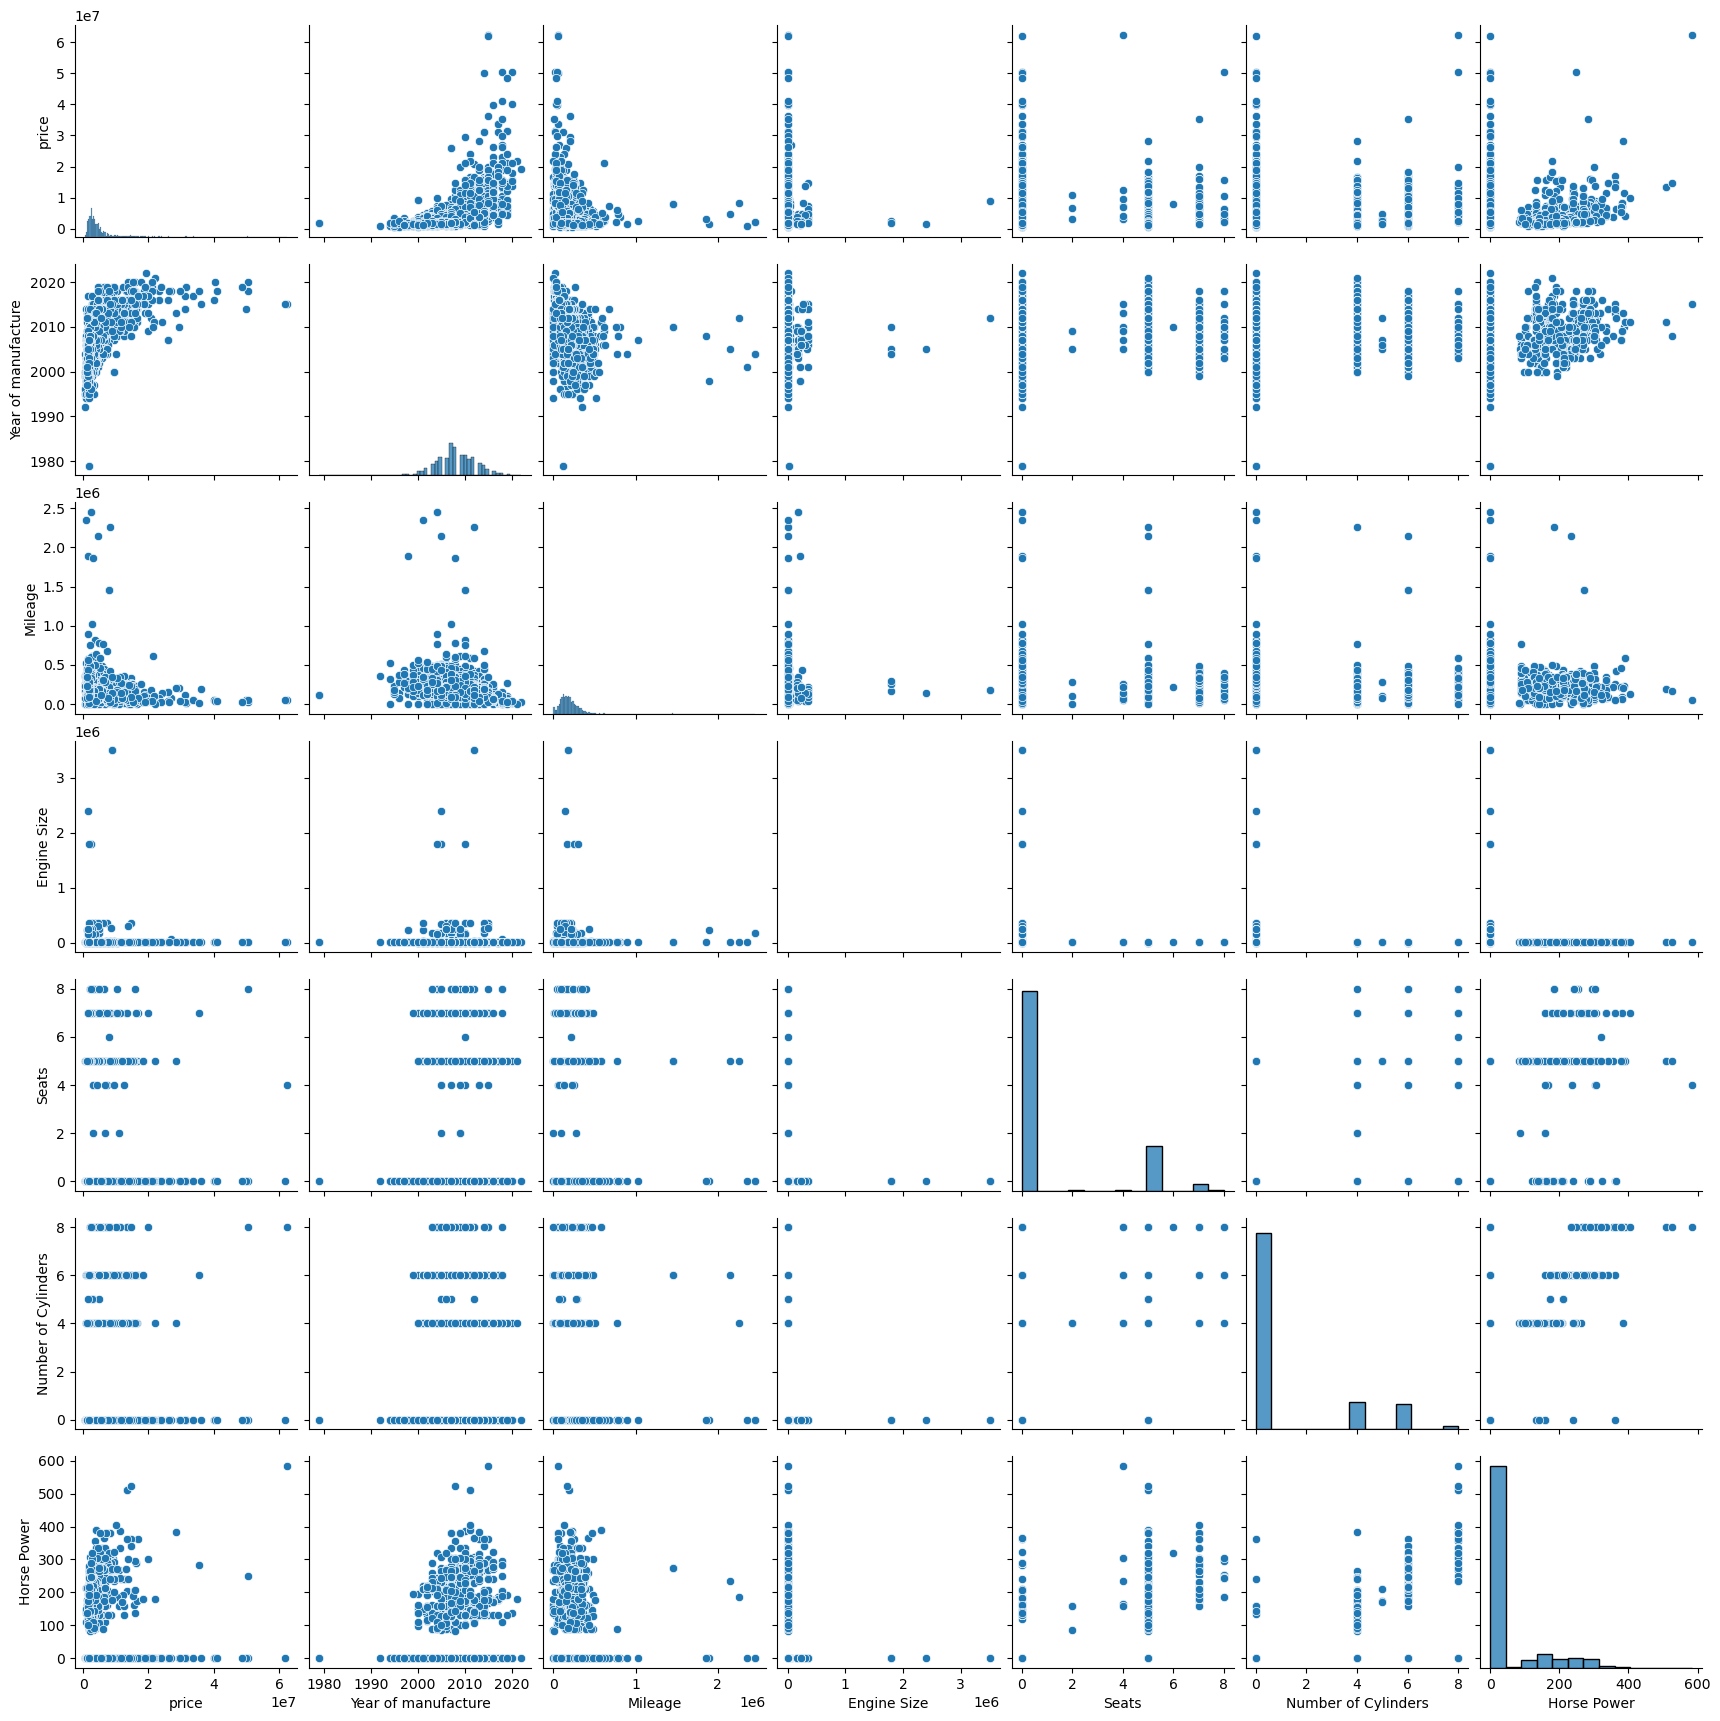

In [38]:
sns.pairplot(df)

# 5 - Analysis of the Data

# 5.1 - Correlation Between Variables (The relatisonship between price and other variables)

***Correlation Analysis using Pearson Correlation Coeficient

Text(0.5, 1.0, 'Pearson Correlation Matrix')

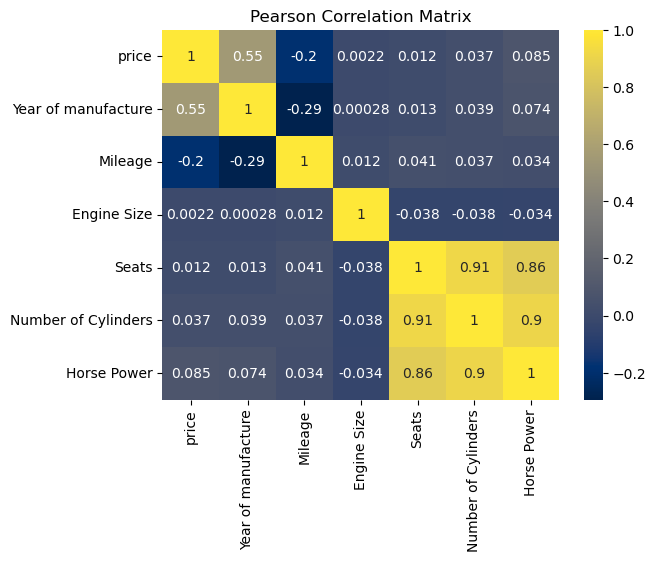

In [39]:
corrx = sns.heatmap(df.corr(method='pearson'), annot=True, cmap='cividis')
corrx.set_title('Pearson Correlation Matrix')

The table above shows a positive relationship between variables. In addition, there appears to be a strong and positive relationship between price and horsepower as well as year of manufacture. The relationship between price and mileage is negative, while engine size, seats, and number of cylinders have a positive but weak relationship with price.

# 5.2 - The effects of independent variables (year of manufacture, mileage, engine size, seats, number of cylinders, and horse power) on the dependent variable (price).

In [41]:
X = np.asarray(df[['price', 'Year of manufacture', 'Mileage','Engine Size', 'Seats', 'Number of Cylinders', 'Horse Power']])
X[0:5]

array([[2.81250e+06, 2.00400e+03, 2.51732e+05, 1.80000e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.00000e+06, 2.00700e+03, 2.24589e+05, 3.70000e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [7.59200e+06, 2.01200e+03, 1.11334e+05, 3.50000e+03, 5.00000e+00,
        6.00000e+00, 3.09000e+02],
       [9.88000e+06, 2.01200e+03, 7.26820e+04, 4.00000e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.16000e+06, 2.01300e+03, 9.21180e+04, 3.50000e+03, 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

# 5.3 - Linear Regression Model Building

Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. ** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [42]:
y = df['price']
X = df[['Year of manufacture', 'Mileage', 'Engine Size', 'Seats', 'Number of Cylinders', 'Horse Power']]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (2604, 6)
y_train shape: (2604,)


In [46]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (1116, 6)
y_test shape: (1116,)


Training the Model
Now its time to train our model on our training data!
***Import LinearRegression from sklearn.linear_model***

In [47]:
from sklearn.linear_model import LinearRegression

***Create an instance of a LinearRegression() model named lm.***

In [48]:
lm = LinearRegression()

In [49]:
lm.fit(X_train,y_train)

LinearRegression()

Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [51]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

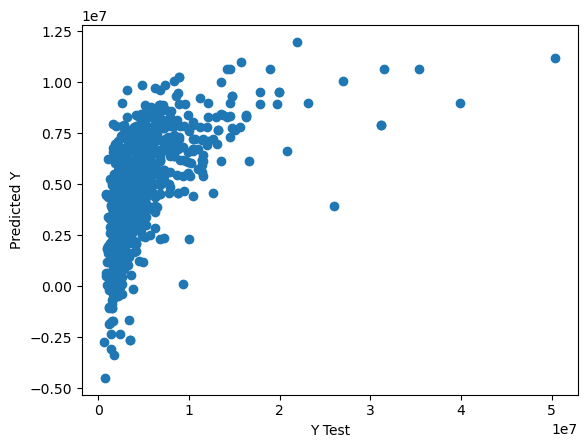

In [52]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Evaluating the Model
** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [53]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2025010.8195220784
MSE: 11062023723236.12
RMSE: 3325962.074834306


Residuals
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

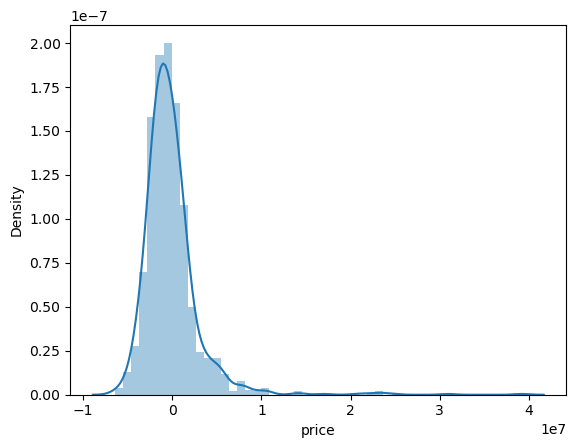

In [54]:
sns.distplot((y_test-predictions),bins=50);

In [56]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     191.5
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          2.26e-202
Time:                        17:11:13   Log-Likelihood:                -43065.
No. Observations:                2604   AIC:                         8.614e+04
Df Residuals:                    2597   BIC:                         8.618e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.091e+09    

Model Summary
The value of R, the multiple correlation coefficient, is shown in the "R" column. R is a metric for the accuracy of the price prediction, which is the dependent variable in this case. A good level of prediction is indicated by a value of 0.307. The R2 value, also known as the coefficient of determination, is shown in the R square column. This value indicates the percentage of the dependent variable's variance that can be explained by each of the independent variables (technically, it is the percentage of deviation that was captured by the regression equation in addition to the mean model). Our value of 0.305 indicates that the variables that are independent account for 30.5% of the variation in our dependent variable, the price. The year of manufacture, mileage, engine size, seats, number of cylinders, and horse power were used to run a multiple regression to predict price. F (4, 95) = 32.393, p. 2.26e-202, and R2 =.307 are the statistically significant variables that significantly predicted price. In terms of statistical significance, all four variables improved the prediction (p.05.)

Interpreting the coefficients:
Holding all other features fixed, a 1 unit increase in **Year of manufacture** is associated with an **increase of 5.458e+05 price**.
Holding all other features fixed, a 1 unit increase in **Mileage ** is associated with an **decresase of 1.2064 price**.
Holding all other features fixed, a 1 unit increase in **Engine Size** is associated with an **increase of 0.0719 price**.
Holding all other features fixed, a 1 unit increase in **Seats** is associated with an **decrease of 2.058e+05 price**.
Holding all other features fixed, a 1 unit increase in **Number of Cylinders** is associated with an **decrease of 1.136e+05 price**.
Holding all other features fixed, a 1 unit increase in **Horse Power** is associated with an **increase of 9454.0011 price**.

# 5.4 - the company should focus more on their mobile app or on their website?**

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!

# 5.5 - Random forest regressor and random forest classifier
The problem with the dataframe is that there are missing values in gender and income columns. To address this, I will use random forest regressor and random forest classifier to predict these values.

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [58]:
# Create X
features = ['price', 'Year of manufacture', 'Mileage', 'Engine Size', 'Seats', 'Number of Cylinders', 'Horse Power']
X = df[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Specify Model
df_model = DecisionTreeRegressor(random_state=1)
# Fit Model
df_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = df_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

# Using best value for max_leaf_nodes
df_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
df_model.fit(train_X, train_y)
val_predictions = df_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 21,628
Validation MAE for best value of max_leaf_nodes: 44,681


In [59]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
df_model = RandomForestRegressor(random_state=1)

# fit your model
df_model.fit(train_X, train_y)
rf_model = df_model.predict(val_X)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_y, rf_model)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 15123.776150537635


# Final Remark

This notebook focus on the variables in the Nigerian Car Prices dataset and investigate whether those variables have similar characteristics or features, using other variables in the data. The variables include car_id', 'price', 'fuel type', 'gear type', 'Make', 'Model', 'Year of manufacture', 'Colour', 'Condition', 'Mileage', 'Engine Size','Selling Condition', 'Bought Condition', 'car', 'Trim', 'Drivetrain', 'Seats', 'Number of Cylinders', 'Horse Power', 'Registered city'.

The data contain 3722 rowas and 20columns. 13 of the variables are categorical (called object'), 5 of the variables are floats, and the remaining variables are numerical (called int').

The descriptive statistics shows that the average price is 4.515702e+06; the average year of manufacture is 2008.146774; the average mileage is 3.720000e+03; the average engine size is 1.090434e+04; the average number of seats is 1.118280; the average number of cylinders is 1.145161; and the average horse power of the cars is 42.347312. Thus, the cars horsepower has the highest mean value. For the median of the dataset, the median of price is 4.297883e+06, the median of cars year of manufacture is 4.206611, the median of cars mileage is 1.405804e+05, the median of cars engine size is 1.082526e+05, the median of cars seats is 2.190323, the median of cars number of cylinders is 2.217388, and the median of cars horse power is 89.861309

Distribution of Cars selling conditions shows that majority of cars in Nigeria is registered while few of the cars in Nigeria brand new cars. 

The data shows that the majority of the cars in Nigeria use gasoline, which is above 3500, followed by a few hybrids, which are less than 500, while the number of cars that use diesel is less than 500. Also, the data shows that there are no electric cars in Nigeria.

Also, the most popular type of car gear in Nigeria is the automatic gear type. Manual car is less that 500, while CVT gear type have the lower number in Nigeria market.

The data shows that Toyota is the most popular car in the Nigerian market, followed by Honda, Mercedes, Ford, Hyundai, Nissan Kia Acura, Volkswagen, Mazda, BMW, Peugeot, and so on. 

Mercedes-Benz 310 S-Class has the highest price, followed by Mercedes-Benz 1667 G-Class, Land Rover 1877, and Toyota 2070. Thus, the most common car with the highest price is a Mercedes-Benz, while the Volkswagen Vento and Honda Civic have the lowest prices compared to others in the Nigerian market.

Toyota 1150, 1136, 1618, 42 and lexus 1986 has the highest mileage, while Nissan 3167,. Thus the most common car with highest Mercedes-Benz and while Volkswagen and Honda has the lowest price compar to others.

Luxus-LS, Mercedes-Benz GL-Class, and Ford F-150 have 8.0 cylinders. Thus, the cars with the highest number of cylinders are the Luxus LS, Mercedes-Benz GL-Class, and Ford F-150.

Toyota (Corolla, Highlander, RAV4, Camry) and KIA Serento are mostly used cars in good condition in the Nigerian market.

The table above shows a positive relationship between variables. In addition, there appears to be a strong and positive relationship between price and horsepower as well as year of manufacture. The relationship between price and mileage is negative, while engine size, seats, and number of cylinders have a positive but weak relationship with price.

The year of manufacture, mileage, engine size, seats, number of cylinders, and horse power statistically have effect on the price.

Also, Holding all other features fixed, an increase in Year of manufacture is associated with an increase in price (5.458e+05), an increase in Mileage is associated with decresase in price (1.2064), a 1 unit increase in Engine Size is associated with an increase in price (0.0719), a 1 unit increase in seats is associated with an decrease of price (2.058e+05), a 1 unit increase in Number of Cylinders is associated with an decrease of price (1.136e+05), while a 1 unit increase in Horse Power is associated with an increase of price (9454.0011).

Thus, the car sellers or dealrs cars in Nigeria should focused on the year of manufacture, engine size, and horse power of the cars to increase sales and profit. In addition, the dealers should bring into Nigeria market toyota 1150, 1136, 1618, 42 and lexus 1986 with the highest mileage and Nissan 3167, Toyota (Corolla, Highlander, RAV4, Camry) and KIA Serento are which is the mostly used cars in good condition in the Nigerian market.

# - Conclusion***

In conclusion, there are different results from the analysis because of the variety of analysis methods. The data contains 3722 rows and 20 columns. 13 of the variables are categorical (called object'), 5 of the variables are floats, and the remaining variables are numerical (called int'). The descriptive statistics show that the average price is 4.515702e+06; the average year of manufacture is 2008.146774; the average mileage is 3.720000e+03; the average engine size is 1.090434e+04; the average number of seats is 1.118280; the average number of cylinders is 1.145161; and the average horse power of the cars is 42.347312. Thus, the car's horsepower has the highest mean value. For the median of the dataset, the median of price is 4.297883 e + 06, the median of cars year of manufacture is 4.206611, the median of cars mileage is 1.405804 e + 05, the median of cars engine size is 1.082526 e + 05, the median of cars seats is 2.190323, the median of cars number of cylinders is 2.217388, and the median of cars horse power is 89.861309 e Distribution of Cars Selling Conditions shows that the majority of cars in Nigeria are registered, while few of the cars in Nigeria are brand new. The data shows that the majority of the cars in Nigeria use gasoline, which is above 3500. Also, the most popular type of car gear in Nigeria is the automatic gear type. The data shows that Toyota is the most popular car in the Nigerian market. The most common car with the highest price is a Mercedes-Benz; Toyota models 1150, 1136, 1618, 42, and Lexus 1986 have the highest mileage; Nissan models 3167, Luxus-LS, Mercedes-Benz GL-Class, and Ford F-150 have 8.0 cylinders. In addition, there appears to be a strong and positive relationship between price and horsepower as well as year of manufacture. The relationship between price and mileage is negative, while engine size, seats, and number of cylinders have a positive but weak relationship with price. The year of manufacture, mileage, engine size, seats, number of cylinders, and horse power statistically have an effect on the price. Also, holding all other features constant, an increase in the year of manufacture is associated with an increase in price (5.458e+05), an increase in mileage is associated with a decrease in price (1.2064), a 1 unit increase in engine size is associated with an increase in price (0.0719), a 1 unit increase in seats is associated with a decrease in price (2.058e+05), a 1 unit increase in the number of cylinders is associated with a decrease in price (1.136e+05), and a 1 unit increase in Horse Power is associated with an increase in the power (9454.0011).